# CVAI SW 02 Übung

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import cv2 as cv

path = '/exchange/cvai/images/'

## Aufgabe 1: Unscharfmaskierung mittels Wärmeleitungsgleichung

In [3]:
img1 = cv.imread (path + 'lenna-blurred.jpg')

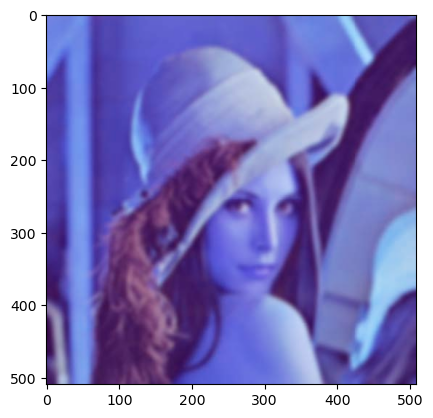

In [4]:
pl.imshow (img1)

Dieses Bild ist unscharf. Verwenden Sie die unscharfe Maskierung um ein schärferes Bild zu berechnen  Konvertieren Sie das Bild vorher auf Graustufen und verarbeiten Sie es so.

Speichern Sie das Original Grauwertbild in der Variablen ub und das geschärfte Bild in der Variablen us.


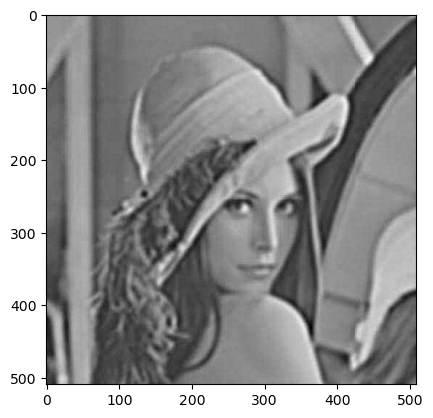

In [22]:
#need to use laplace instead
size = 21
ub = cv.cvtColor (img1, cv.COLOR_BGR2GRAY) / 255.0
blur = cv.GaussianBlur(ub, (size, size), 0)
mask = ub - blur
us = gray + 3 * mask
pl.imshow(us, cmap = 'gray')

(509, 509) 0.12156862745098039 0.8823529411764706
(509, 509) -0.16439448230228867 1.1648576405267879


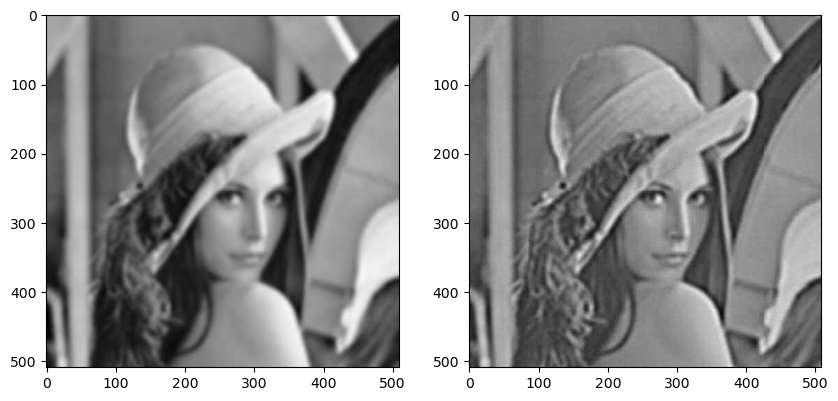

In [21]:
def Show (img):
    print (img.shape, np.min (img), np.max (img))
    pl.imshow (img, cmap = 'gray')
    
pl.figure (figsize = (10, 5))
pl.subplot (1, 2, 1); Show (ub)
pl.subplot (1, 2, 2); Show (us)
np.testing.assert_almost_equal(us[100,100], 0.4156, 0.001)

## Aufgabe 2: Rauschunterdrückung mit Medianfilter

In [5]:
img2 = cv.imread (path + 'gw-test-pattern-noise.jpg')

In [6]:
cv.imwrite('gw-test-pattern-noise.jpg', img2)

True

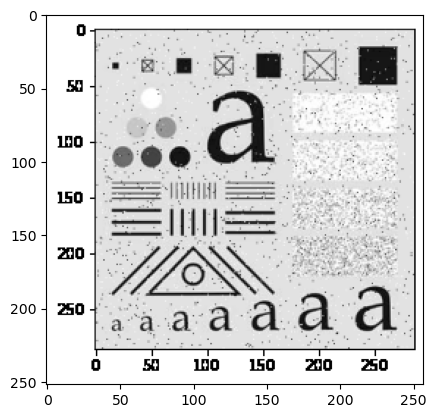

In [23]:
pl.imshow (img2)

Das dargestellte Bild enthält Rauschen. Berechnen Sie ein mit Tiefpass geglättetes Bild (img_blurred) und dann ein mit Medianfilter bearbeitete Bild (img_median)

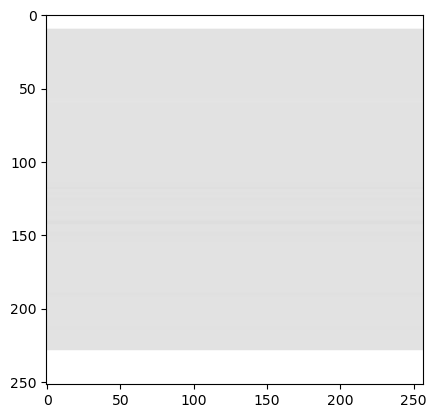

In [25]:
def Apply (f, img):
    res = np.copy (img)
    r = 1
    for i in range (r, res.shape [0] - r):
        res [i] = f (img [i - r : i + r + 1])
    return res

img_blurred = Apply(np.median, img2)
pl.imshow(img_blurred)

In [ ]:
pl.figure (figsize = (15, 5))
pl.subplot (1, 3, 1); Show (img2)
pl.subplot (1, 3, 2); Show (img_blurred)
pl.subplot (1, 3, 3); Show (img_median)